#  中文分词及词云分析

## 1. 加载停用词

In [1]:
# 加载停用词
stopwords1 = [line.rstrip() for line in open('./stop_words/中文停用词库.txt', 'r', encoding='utf-8')]
stopwords2 = [line.rstrip() for line in open('./stop_words/哈工大停用词表.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('./stop_words/四川大学机器智能实验室停用词库.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3

In [2]:
len(stopwords)

2489

## 2. 文本预处理函数定义

In [3]:
import jieba.posseg as pseg
import re

def preprocess_text(raw_text):
    """
        文本预处理操作

        参数：
            - raw_text  原始文本

        返回：
            - proc_text 处理后的文本
    """
    # 1. 使用正则表达式去除非中文字符
    filter_pattern = re.compile('[^\u4E00-\u9FD5]+')
    chinese_only = filter_pattern.sub('', raw_text)

    # 2. 结巴分词+词性标注
    words_lst = pseg.cut(chinese_only)

    # 3. 去除停用词
    meaninful_words = []
    for word, flag in words_lst:
        # if (word not in stopwords) and (flag == 'v'):
        # 也可根据词性去除非动词等
        if word not in stopwords:
            meaninful_words.append(word)

    proc_text = ' '.join(meaninful_words)

    return proc_text

## 3. 查看结果

In [6]:
raw_text = '人工智能（AI）越来越受到企业决策者的关注。鉴于此，人工智能用例正在增长并不奇怪。根据Gartner的研究，智能机器将在2021年实现主流应用，30％的大型公司使用人工智能。'
words1 = preprocess_text(raw_text)
print(words1)

人工智能 越来越 企业 决策者 关注 人工智能 用例 正在 增长 奇怪 研究 智能 机器 年 实现 主流 应用 大型 公司 使用 人工智能


In [7]:
raw_text = '家居领域的智能化趋势越来越突出，并逐渐形成了庞大的智能家居行业。本文将以生活中具体的智能家居为例，为读者呈现一个全面的智能家居生活环境。'
words2 = preprocess_text(raw_text)
print(words2)

家居 领域 智能化 趋势 越来越 突出 逐渐 形成 庞大 智能家居 行业 本文 生活 中 具体 智能家居 例为 读者 呈现 全面 智能家居 生活 环境


## 4. 词云分析

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

def generate_word_cloud(words):
    """
        生成词云
    """
    font_path = './DroidSansFallbackFull.ttf'
    wordcloud = WordCloud(font_path=font_path).generate(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

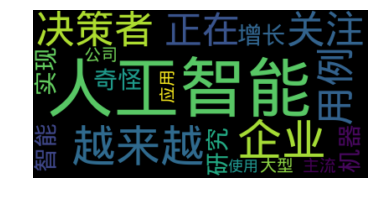

In [21]:
generate_word_cloud(words1)

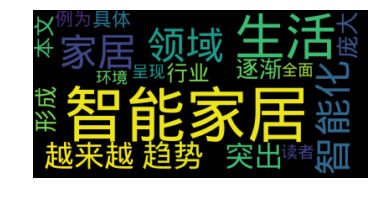

In [22]:
generate_word_cloud(words2)